<a href="https://colab.research.google.com/github/dkmishra2407/machinelearning-/blob/main/SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/SMSSpamCollection',sep='\t',names=['label','text'])

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
 !pip install nltk

In [ ]:
import nltk  #NATURAL LANGUAGE TOOL KIT

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt' resource (only needs to be done once)
nltk.download('punkt')

# Now you can use word_tokenize
sent = "Hello Friends! How are You?"
tokens = word_tokenize(sent)
print(tokens)

['Hello', 'Friends', '!', 'How', 'are', 'You', '?']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.corpus import stopwords # FOR REMOVING STOP WORDS LIKE HE , HELLO
swords = stopwords.words('english')

In [ ]:
clean = [word for word in tokens if word not in swords]

In [ ]:
clean

['Hello', 'Friends', '!', 'How', 'You', '?']

In [ ]:
 from nltk.stem import PorterStemmer    #FOR REMOVING ED , S FROM THE WORDS
 ps = PorterStemmer()

In [ ]:
clean = [ps.stem(word) for word in word_tokenize(sent)
if word not in swords]

In [ ]:
clean

['hello', 'friend', '!', 'how', 'you', '?']

In [ ]:
def clean_text(sent):
  tokens = word_tokenize(sent)
  clean = [word for word in tokens
           if word.isdigit() or word.isalpha()]
  clean = [ps.stem(word) for word in clean
           if word not in swords]
  return clean

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [ ]:
x_new = tfidf.fit_transform(df['text'])

In [ ]:
x_new.shape

(5572, 6513)

In [ ]:
y = (df['label'])

In [ ]:
y.value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_new , y , test_size=0.25, random_state=42)

In [ ]:
x_train.shape

(4179, 6513)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(x_train.toarray() , y_train)

GaussianNB()

In [ ]:
predict = nb.predict(x_test.toarray())

0.8786791098348887


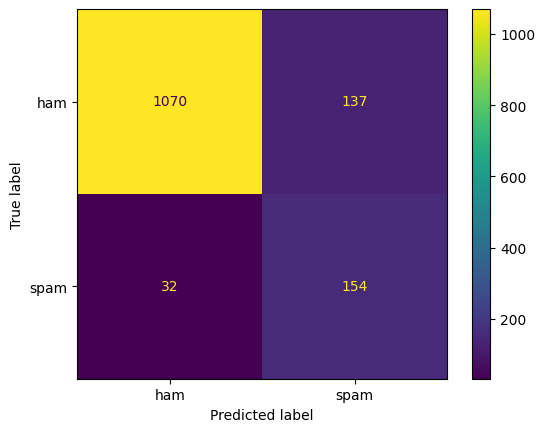

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test,predict)
print(accuracy_score(y_test,predict))

In [ ]:
 from sklearn.ensemble import RandomForestClassifier
 rf = RandomForestClassifier(random_state=42)

In [ ]:
rf.fit(x_train.toarray(),y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rfpredict = rf.predict(x_test.toarray())

accuracy_score(y_test,rfpredict)

0.9770279971284996

In [ ]:
# HYPER PARAMETER TUNING
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log2'],
    'random_state':[1,2,3,4,5],
    'class_weight':['balanced','balanced_subsample']
}

In [ ]:
grid = GridSearchCV(rf,param_grid,cv=5,scoring='accuracy')

In [ ]:
grid.fit(x_train.toarray(),y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 2, 3, 4, 5]},
             scoring='accuracy')